In [19]:
import pandas as pd
import statsmodels.formula.api as smf
from linearmodels import OLS, IV2SLS
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Profit-maximizing price $P_i^*$ as a function of ($b_1, b_0, c_i, U_i$)

$Q_i(P_i)=b_0+b_1P_i+U_i$

$π_i(P_i)=Q_i(P_i)(P_i-c_i)=(b_0+b_1P_i+U_i)(P_i-c_i)$ 

First Order Condition:

$π_i(P_i)=0$

$π_i^1(P_i)= b_0+U_i+2b_1P_i-b_1c_i=0$

$P_i^*=(b_1c_i-b_0-U_i)/2b_1$

Profit-maximizing quantity $Q_i^*$ as a function of ($b_1, b_0, c_i, U_i$)

$Q_i^*=b_0+b_1P_i^*+U_i$

plug in for $P_i^*$ from previous answer

$Q_i^*=b_0+b_1((b_1c_i-b_0-U_i)/2b_1)+U_i$

$Q_i^*=(b_0/2)+(U_i/2)+(b_1c_i/2)$

In [ ]:
# Import data
df_data = pd.read_csv("cement_data.csv")
df_data.describe()

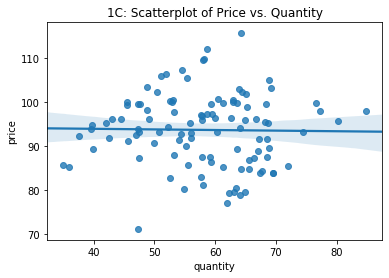

(Text(0.5, 1, '1C: Scatterplot of Price vs. Quantity'), None)

In [21]:
# Scatterplot of Price vs. Quantity
sns.regplot(x='quantity', y='price', data=df_data).set_title(
    'Scatterplot of Price vs. Quantity'), plt.show()

The slope of the relation between price and quantity is a biased estimate of the $b_1$ parameter in the above demand function. This is because $(b_1c_i-b_0-U_i)/(2b_1)$ aka $P_i^*$, is correlated with $U_i$. Therefore, a change in $U_i$ will result in a change in $(b_1c_i-b_0-U_i)/(2b_1)$ as well. So, $b_1^{OLS}$ will not be a good correlator for $b_1$.

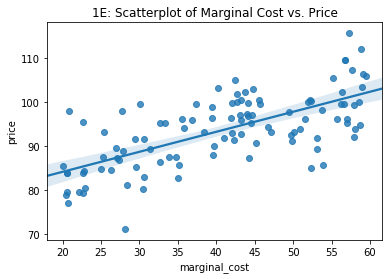

(Text(0.5, 1, '1E: Scatterplot of Marginal Cost vs. Price'), None)

In [34]:
# Scatterplot of Price vs. Cost
sns.regplot(x='marginal_cost', y='price', data=df_data).set_title(
    'Scatterplot of Marginal Cost vs. Price'), plt.show()

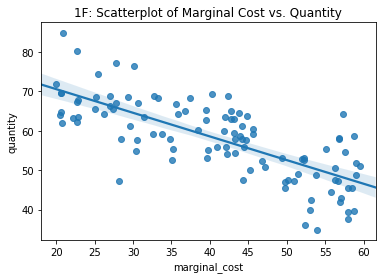

(Text(0.5, 1, '1F: Scatterplot of Marginal Cost vs. Quantity'), None)

In [33]:
# Scatterplot of Quantity vs. Cost
sns.regplot(x='marginal_cost', y='quantity', data=df_data).set_title(
    'Scatterplot of Marginal Cost vs. Quantity'), plt.show()

In [25]:
# Regress price on marginal cost
model = OLS.from_formula('price ~ marginal_cost', data=df_data)
res = model.fit()
print(res.summary)

# check results
coeff_reg1 = res.params.marginal_cost
coeff_reg1

                            OLS Estimation Summary                            
Dep. Variable:                  price   R-squared:                      0.4626
Estimator:                        OLS   Adj. R-squared:                 0.4574
No. Observations:                 107   F-statistic:                    80.180
Date:                Fri, Sep 20 2019   P-value (F-stat)                0.0000
Time:                        18:42:40   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         75.085     2.1215     35.392     0.0000      70.927      79.243
marginal_cost     0.4543     0.0507     

0.4542652675731489

In [26]:
# Regress quantity on marginal cost
model = OLS.from_formula('quantity ~ marginal_cost', data=df_data)
res = model.fit()
# display results
print(res.summary)

# assign results
coeff_reg2 = res.params.marginal_cost
coeff_reg2

                            OLS Estimation Summary                            
Dep. Variable:               quantity   R-squared:                      0.5540
Estimator:                        OLS   Adj. R-squared:                 0.5498
No. Observations:                 107   F-statistic:                    115.72
Date:                Fri, Sep 20 2019   P-value (F-stat)                0.0000
Time:                        18:43:38   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         82.593     2.3337     35.392     0.0000      78.019      87.167
marginal_cost    -0.6003     0.0558    -

-0.6003082056695401

In [27]:
coeff_reg2 / coeff_reg1

-1.3214926355180223

In [28]:
iv_model = IV2SLS.from_formula('quantity ~ 1 + [price ~ marginal_cost]', data=df_data)
res = iv_model.fit()
print(res.summary)
beta1 = res.params[1]
beta1

                          IV-2SLS Estimation Summary                          
Dep. Variable:               quantity   R-squared:                     -1.1613
Estimator:                    IV-2SLS   Adj. R-squared:                -1.1819
No. Observations:                 107   F-statistic:                    23.880
Date:                Fri, Sep 20 2019   P-value (F-stat)                0.0000
Time:                        18:44:37   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      181.82     25.289     7.1897     0.0000      132.25      231.38
price         -1.3215     0.2704    -4.8867     0.00

-1.3214926355181262

In [30]:
# Demand elasticities
etas =  beta1 * df_data.price/df_data.quantity
etas.describe()

count    107.000000
mean      -2.199551
std        0.445616
min       -3.240177
25%       -2.515963
50%       -2.128331
75%       -1.842462
max       -1.525994
dtype: float64

Lerner Index = Markup = -1/elasticity of demand 

$(P-C'(Q))/P$ = -1/elasticity of demand

These cement plants are pricing on the elastic(n < -1) portion of the demand function. We know that cement plants act as local monopolies. Monoplist will always set price at a point on the demand curve where n < -1 because the portion of the price that is a markup over cost can't be greater than the price itself.

In [31]:
# Quantity at marginal cost
    # First need to recover (beta_0 + u_i) for every market. 
    # To do this, I back this out given the existing price and quantity.
beta0_plus_noise = df_data.quantity - beta1 * df_data.price

    # Now that we have that, we can plug in marginal cost to the demand function
Q_pc = beta1 * df_data.marginal_cost + beta0_plus_noise
Q_pc.mean()

127.77701006679501

calculating dead weight loss:

$DWL_i = (1/2)(Q_i^{pc})-Q_i^*)(P_i^*-c_i)$

In [32]:
#DWL
DWL = 0.5 * (Q_pc - df_data.quantity) * (df_data.price - df_data.marginal_cost)
DWL.sum()

202469.71236043135